In [ ]:
#COMMENT:

Preprocessing:
--> Here we have image data so we need to reshape the image in equal size
--> Convert it to array format

Modelling:
    
-> Take only 2000 images first in training( dataset have 10k images)
-> While training apply batch normalization and dropout

Shown below: 
agemodel = Sequential()
agemodel.add(Conv2D(32, (3,3), activation='relu', input_shape=(200, 200, 3)))
agemodel.add(MaxPooling2D((2,2)))
agemodel.add(Conv2D(64, (3,3), activation='relu'))
agemodel.add(MaxPooling2D((2,2)))
agemodel.add(Conv2D(128, (3,3), activation='relu'))
agemodel.add(MaxPooling2D((2,2)))
agemodel.add(Flatten())
agemodel.add(Dense(64, activation='relu'))
agemodel.add(Dropout(0.5))
agemodel.add(Dense(1, activation='relu'))

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPool2D, Dropout, Flatten, BatchNormalization, Activation
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mimg
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image as img

In [3]:
!tar -xvzf crop_part1.tar.gz

Streaming output truncated to the last 5000 lines.
crop_part1/14_0_0_20170110224441502.jpg.chip.jpg
crop_part1/62_0_2_20170104212649180.jpg.chip.jpg
crop_part1/24_1_3_20170104222905601.jpg.chip.jpg
crop_part1/43_0_1_20170104185752431.jpg.chip.jpg
crop_part1/18_1_4_20170103222943622.jpg.chip.jpg
crop_part1/29_1_4_20170103230119816.jpg.chip.jpg
crop_part1/1_0_2_20161219212648582.jpg.chip.jpg
crop_part1/2_0_2_20161219222111287.jpg.chip.jpg
crop_part1/65_0_0_20170111203730182.jpg.chip.jpg
crop_part1/24_1_3_20170104222402975.jpg.chip.jpg
crop_part1/13_0_0_20170110225438328.jpg.chip.jpg
crop_part1/24_0_0_20170104165239658.jpg.chip.jpg
crop_part1/47_1_0_20170109132641773.jpg.chip.jpg
crop_part1/2_1_2_20161219162336446.jpg.chip.jpg
crop_part1/21_0_4_20161223214827816.jpg.chip.jpg
crop_part1/60_0_0_20170109013457906.jpg.chip.jpg
crop_part1/68_1_0_20170110175345439.jpg.chip.jpg
crop_part1/52_1_0_20170110143721250.jpg.chip.jpg
crop_part1/28_1_1_20170103225945785.jpg.chip.jpg
crop_part1/5_1_1_2016

In [4]:
content_data = []
data = []

In [5]:
import os
for i in os.listdir("/content/crop_part1"):
    content= i.split("_")
    if ((content[0].isnumeric()) and (content[1].isnumeric()) and (content[2].isnumeric())):
        content_data.append([content[0],content[1],content[2],os.path.join("/content/crop_part1/",i)])

In [6]:
data = pd.DataFrame(content_data,columns=["Age","Gender","Race","Filepath"])

In [7]:
data.head(10)

,Age,Gender,Race,Filepath
0,59,0,0,/content/crop_part1/59_0_0_20170109012750162.j...
1,1,0,2,/content/crop_part1/1_0_2_20161219204951309.jp...
2,1,0,2,/content/crop_part1/1_0_2_20161219202542596.jp...
3,1,0,0,/content/crop_part1/1_0_0_20170110205339425.jp...
4,28,0,4,/content/crop_part1/28_0_4_20170103235229669.j...
5,63,0,0,/content/crop_part1/63_0_0_20170104213529213.j...
6,6,0,3,/content/crop_part1/6_0_3_20161220222811027.jp...
7,62,1,0,/content/crop_part1/62_1_0_20170104183415429.j...
8,10,1,0,/content/crop_part1/10_1_0_20170109203357787.j...
9,36,0,0,/content/crop_part1/36_0_0_20170105172611117.j...


In [8]:
data["Race"] = data["Race"].replace({"0":"White","1":"Black","2":"Asian","3":"Indian","4":"Others"})
data["Gender"] = data["Gender"].replace({"0":"male","1":"female"})

In [9]:
data.head(10)

,Age,Gender,Race,Filepath
0,59,male,White,/content/crop_part1/59_0_0_20170109012750162.j...
1,1,male,Asian,/content/crop_part1/1_0_2_20161219204951309.jp...
2,1,male,Asian,/content/crop_part1/1_0_2_20161219202542596.jp...
3,1,male,White,/content/crop_part1/1_0_0_20170110205339425.jp...
4,28,male,Others,/content/crop_part1/28_0_4_20170103235229669.j...
5,63,male,White,/content/crop_part1/63_0_0_20170104213529213.j...
6,6,male,Indian,/content/crop_part1/6_0_3_20161220222811027.jp...
7,62,female,White,/content/crop_part1/62_1_0_20170104183415429.j...
8,10,female,White,/content/crop_part1/10_1_0_20170109203357787.j...
9,36,male,White,/content/crop_part1/36_0_0_20170105172611117.j...


In [24]:
data["Gender"].value_counts()

female    5406
male      4372
Name: Gender, dtype: int64

In [25]:
data.shape

(9778, 4)

In [25]:
train, test = train_test_split(data, test_size=0.2)

In [26]:
train.shape

(7822, 4)

In [27]:
test.shape

(1956, 4)

In [ ]:
Race = tf.keras.utils.to_categorical(data["Race"],5)
Gender = tf.keras.utils.to_categorical(data["Gender"],2)

In [ ]:
print(Gender)
print(Race)

array([1., 0., 0., 0., 0.], dtype=float32)

In [28]:
imgdatagen = ImageDataGenerator(validation_split=0.2)

In [61]:
train_data = []
test_data = []
model = []

In [29]:
train_data = imgdatagen.flow_from_dataframe(dataframe=train,x_col="Filepath",directory="/content/crop_part1/",y_col="Gender",class_mode="binary",classes=["male","female"],target_size=(150,150),subset='training')

Found 6258 validated image filenames belonging to 2 classes.


In [30]:
val_data = imgdatagen.flow_from_dataframe(dataframe=train,x_col="Filepath",directory="/content/crop_part1/",y_col="Gender",class_mode="binary",classes=["male","female"],target_size=(150,150),subset="validation")

Found 1564 validated image filenames belonging to 2 classes.


In [31]:
testimgdatagen = ImageDataGenerator()
test_data = testimgdatagen.flow_from_dataframe(dataframe=test,x_col="Filepath",directory="/content/crop_part1/",y_col="",class_mode=None,target_size=(150,150))

Found 1956 validated image filenames.


In [36]:
model = []

In [37]:
model = Sequential()

In [39]:
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
#sigmoid activation function
##Here we can also use softmax as Activation function
##In the scenario of using softmax there will be 2 neurons in the output layer
##Such as 
##model.add(Dense(2,activation='softmax',name="Dense_layer_2"))

In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 73984)             0         
_________________________________________________________________
dense (Dense)                (None, 64)               

In [41]:
model.compile(optimizer="Adam",loss="binary_crossentropy",metrics=["accuracy"])

In [42]:
model.fit_generator(train_data,validation_data=val_data,epochs=20)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
196/196 [==============================] - 43s 53ms/step - loss: 27.8714 - accuracy: 0.5853 - val_loss: 0.6549 - val_accuracy: 0.6113
Epoch 2/20
196/196 [==============================] - 10s 49ms/step - loss: 0.6362 - accuracy: 0.6545 - val_loss: 0.6476 - val_accuracy: 0.6682
Epoch 3/20
196/196 [==============================] - 10s 49ms/step - loss: 0.6519 - accuracy: 0.6448 - val_loss: 0.6507 - val_accuracy: 0.6490
Epoch 4/20
196/196 [==============================] - 10s 49ms/step - loss: 0.7851 - accuracy: 0.6455 - val_loss: 0.7237 - val_accuracy: 0.5243
Epoch 5/20
196/196 [==============================] - 10s 49ms/step - loss: 0.6585 - accuracy: 0.5916 - val_loss: 0.7147 - val_accuracy: 0.6157
Epoch 6/20
196/196 [==============================] - 9s 48ms/step - loss: 0.7038 - accuracy: 0.5802 - val_loss: 0.7544 - val_accuracy: 0.5345
Epoch 7/20
196/196 [==============================] - 9s 48ms/step - loss: 0.6382 - accuracy: 0.5898 - val_loss: 0.7210 - val_accuracy: 

In [43]:
train.head(10)

,Age,Gender,Race,Filepath
4139,5,female,Asian,/content/crop_part1/5_1_2_20161219200132701.jp...
4451,47,female,White,/content/crop_part1/47_1_0_20170111182452927.j...
2993,15,female,White,/content/crop_part1/15_1_0_20170109203912357.j...
4126,57,female,White,/content/crop_part1/57_1_0_20170110131940730.j...
2129,44,male,Black,/content/crop_part1/44_0_1_20170111181750405.j...
8924,15,male,White,/content/crop_part1/15_0_0_20170110225410802.j...
1057,3,male,Asian,/content/crop_part1/3_0_2_20161219221758967.jp...
6209,51,male,Black,/content/crop_part1/51_0_1_20170111200729699.j...
5680,1,male,Asian,/content/crop_part1/1_0_2_20161219141023272.jp...
9684,11,female,White,/content/crop_part1/11_1_0_20170109204546617.j...


In [44]:
test.head(10)

,Age,Gender,Race,Filepath
2576,37,female,White,/content/crop_part1/37_1_0_20170104194539720.j...
7400,65,female,White,/content/crop_part1/65_1_0_20170110131349129.j...
1373,1,male,Indian,/content/crop_part1/1_0_3_20161220221612859.jp...
4683,8,female,White,/content/crop_part1/8_1_0_20170109203448247.jp...
1800,68,male,White,/content/crop_part1/68_0_0_20170109012554003.j...
6635,59,female,White,/content/crop_part1/59_1_0_20170110160643688.j...
4341,29,male,White,/content/crop_part1/29_0_0_20170105164610203.j...
5843,49,female,White,/content/crop_part1/49_1_0_20170109142131660.j...
871,86,male,White,/content/crop_part1/86_0_0_20170111210655997.j...
6247,48,female,White,/content/crop_part1/48_1_0_20170110152853674.j...


In [45]:
model.evaluate_generator(test_data)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.0, 0.0]

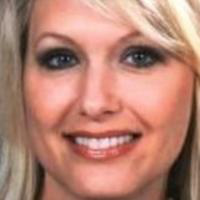

In [46]:
tf.keras.preprocessing.image.load_img(test.Filepath[6247])

In [50]:
imgpred = tf.keras.preprocessing.image.load_img(test.Filepath[2576],target_size=(150,150))
imgpred = tf.keras.preprocessing.image.img_to_array(imgpred)
imgpred = np.expand_dims(imgpred, axis=0)

In [51]:
np.argmax(model.predict(imgpred))

0

In [ ]:
rslt

array([[3.5590822e-01, 7.9168167e-06, 1.7495669e-03, 1.9286161e-02,
        6.2304813e-01]], dtype=float32)